# 미니 프로젝트 (1)
- 관련 사이트: https://dacon.io/competitions/open/235536/data

- 과제: 지금까지 배운 pandas 코드를 통해 유의미한 결과 5개 이상 출력하고, 그래프 그리기 (데이터 전처리는 예시 참고)

  조건: 변수 2개 이상 연결한 결과값 포함

* 위의 주소에서 데이터를 다운받은 후, 사이트의 내용을 참고하여 새로 알고자 하는 내용으로 데이터를 분석하시면 됩니다. 분석은 train.csv 파일만을 이용하시면 됩니다.

* 분석 파일을 github에 업로드 후 링크를 과제함에 댓글로 달아주시면 됩니다.

* 데이터 전처리 및 분석 예시는 카페에 업로드 되어 있으니 참고 바랍니다.

* 제출기한: 2022.04.08 (금) 23:59

# **1. 라이브러리 및 데이터**


In [ ]:
# matplotlib 한글 깨짐방지
# 아래코드 실행후 '런타임 다시시작' 후 모듈 불러오기
# 참고 블로그: https://teddylee777.github.io/colab/colab-korean
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 데이터 불러오기
train=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ESAA/data/movies_train.csv")

# **2. 탐색적 자료분석(EDA)**



## 1) 일부 데이터 미리보기


+ title : 영화의 제목
+ distributor : 배급사
+ genre : 장르
+ release_time : 개봉일
+ time : 상영시간(분)
+ screening_rat : 상영등급
+ director : 감독이름
+ dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
+ dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
+ num_staff : 스텝수
+ num_actor : 주연배우수
+ box_off_num : 관객수

In [ ]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
train.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532


## 2) 데이터 요약


In [ ]:
print(train.shape)

(600, 12)


- 600개의 데이터와 12개의 변수가 존재


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


## 3) 데이터의 요약통계량 확인

In [ ]:
pd.options.display.float_format = '{:.1f}'.format

In [ ]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.0,270.0,600.0,600.0,600.0,600.0
mean,100.9,1050442.9,0.9,151.1,3.7,708181.8
std,18.1,1791408.3,1.2,165.7,2.4,1828005.9
min,45.0,1.0,0.0,0.0,0.0,1.0
25%,89.0,20380.0,0.0,17.0,2.0,1297.2
50%,100.0,478423.6,0.0,82.5,3.0,12591.0
75%,114.0,1286568.6,2.0,264.0,4.0,479886.8
max,180.0,17615314.0,5.0,869.0,25.0,14262766.0


## 4) 결측치 확인 및 데이터 전처리


In [ ]:
train.isna().sum()

,0
title,0
distributor,0
genre,0
release_time,0
time,0
screening_rat,0
director,0
dir_prev_bfnum,330
dir_prev_num,0
num_staff,0


- dir_prev_bfnum 변수에 결측값이 330개 존재한다.

In [ ]:
# 결측값의 특성 확인
train[train['dir_prev_bfnum'].isna()].head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778


In [ ]:
train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum()

0

- dir_prev_bfnum이 결측값으로 존재하는 데이터들은 전부 dir_prev_num이 0인 영화들이다. 즉, 감독의 이전작품이 존재 하지 않은 경우이다. 따라서 dir_prev_bfnum에 있는 결측값은 전부 0으로 채운다.

In [ ]:
train['dir_prev_bfnum'].fillna(0, inplace=True)

In [ ]:
# 잘 적용되었는지 확인
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.0,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.2,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.0,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.0,1,251,2,483387


- release_time은 시간에 관련된 데이터인데 int형으로 인식되고 있다. release_time을 datetime형식으로 변환한다.

In [ ]:
train['release_time'] = pd.to_datetime(train['release_time'])

In [ ]:
# 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           600 non-null    object        
 1   distributor     600 non-null    object        
 2   genre           600 non-null    object        
 3   release_time    600 non-null    datetime64[ns]
 4   time            600 non-null    int64         
 5   screening_rat   600 non-null    object        
 6   director        600 non-null    object        
 7   dir_prev_bfnum  600 non-null    float64       
 8   dir_prev_num    600 non-null    int64         
 9   num_staff       600 non-null    int64         
 10  num_actor       600 non-null    int64         
 11  box_off_num     600 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 56.4+ KB


* 시각화 및 분석 과정에서의 편의를 위해 release_time 변수를 개봉 연도, 분기, 월, 계절, 요일로 나눈 변수를 생성

In [ ]:
# 연도, 분기, 월, 요일 변수 생성
train['release_year'] = train['release_time'].dt.year
train['release_quarter'] = train['release_time'].dt.quarter
train['release_month'] = train['release_time'].dt.month
train['release_weekday'] = train['release_time'].dt.weekday   # 0~6까지, 월요일(0)~일요일(6)

In [ ]:
# 확인
train[['release_time','release_year','release_quarter','release_month','release_weekday']].head()

,release_time,release_year,release_quarter,release_month,release_weekday
0,2012-11-22,2012,4,11,3
1,2015-11-19,2015,4,11,3
2,2013-06-05,2013,2,6,2
3,2012-07-12,2012,3,7,3
4,2010-11-04,2010,4,11,3


In [ ]:
#개봉한 계절을 입력하기 위한 함수 생성
#봄 : 3~5월, 여름 : 6~8월, 가을 : 9~11월, 겨울 : 12~2월로 설정
def get_category(month):
    cat=''
    if (month==12) | (month<=2) : cat = 'Winter'
    elif month <= 5 : cat = 'Spring'
    elif month <= 8 : cat = 'Summer'
    else : cat = 'Autumn'

    return cat

#lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 지정
train['release_season'] = train['release_month'].apply(lambda x : get_category(x))

#확인
train[['release_time','release_month','release_season']]

,release_time,release_month,release_season
0,2012-11-22,11,Autumn
1,2015-11-19,11,Autumn
2,2013-06-05,6,Summer
3,2012-07-12,7,Summer
4,2010-11-04,11,Autumn
...,...,...,...
595,2014-08-13,8,Summer
596,2013-03-14,3,Spring
597,2010-09-30,9,Autumn
598,2015-05-14,5,Spring


In [ ]:
# 전체 데이터 확인
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_year,release_quarter,release_month,release_weekday,release_season
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.0,0,91,2,23398,2012,4,11,3,Autumn
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501,2015,4,11,3,Autumn
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.2,4,343,4,6959083,2013,2,6,2,Summer
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.0,2,20,6,217866,2012,3,7,3,Summer
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.0,1,251,2,483387,2010,4,11,3,Autumn


# **3. 데이터 시각화 및 분석**

## 1. 스텝수와 상영시간 간의 관계

In [ ]:
train_staff = train.groupby('num_staff')['time'].mean().reset_index()
train_staff

,num_staff,time
0,0,85.3
1,1,86.9
2,2,80.8
3,3,85.1
4,4,96.6
...,...,...
291,683,156.0
292,687,122.0
293,719,135.0
294,868,130.0


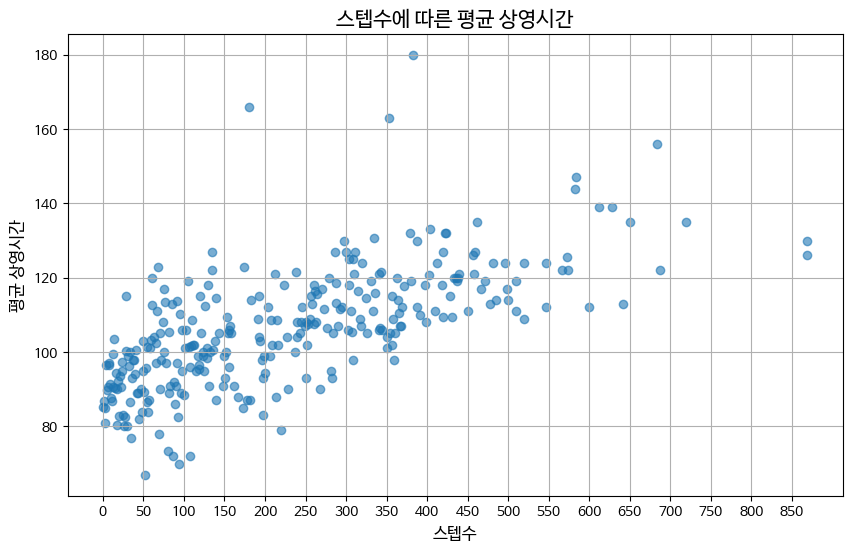

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(train_staff['num_staff'], train_staff['time'], alpha=0.6)
plt.xlabel('스텝수', fontsize=12)
plt.ylabel('평균 상영시간', fontsize=12)
plt.title('스텝수에 따른 평균 상영시간', fontsize=15)
plt.xticks(range(0, train_staff['num_staff'].max() + 1, 50))  # X축 눈금 조절
plt.grid(True)
plt.show()

- 분석 결과: 스텝수와 평균 상영시간 간에 선형 관계가 나타난다. 스텝수가 늘어날수록 평균 상영시간이 늘어나는 경향이 있다.

In [ ]:
# num_staff와 time의 상관계수 계산
correlation_coefficient_1 = np.corrcoef(train_staff['num_staff'].values, train_staff['time'].values)[0, 1]

print(f'num_staff와 time 간의 상관계수: {correlation_coefficient_1}')

num_staff와 time 간의 상관계수: 0.6731973395734264


- 두 변수의 선형관계를 나타내는 척도인 상관계수(r)를 구했더니 0.673이다. |r| >= 0.65이면 유의미하다고 보기 때문에, r=0.673은 스텝수와 평균 상영시간 간에 유의미한 양의 상관관계가 있음을 나타낸다.

## 2. 감독의 이전영화 평균 관객수와 주연배우수 간의 관계

- 앞서 감독의 이전영화 평균 관객수(dir_prev_bfnum)의 결측치를 0으로 처리했기 때문에 그래프 시각화에 앞서 dir_prev_bfnum=0인 데이터를 제외한 데이터프레임을 만들어야 한다

In [ ]:
train_pre = train.groupby('dir_prev_bfnum')['num_actor'].mean().reset_index()
filtered_data = train_pre[train_pre['dir_prev_bfnum'] != 0]
filtered_data

,dir_prev_bfnum,num_actor
1,1.0,2.0
2,7.0,5.0
3,8.0,2.0
4,17.0,4.0
5,19.0,3.0
...,...,...
241,7838528.5,4.0
242,7855474.0,5.0
243,8223342.0,11.0
244,8801639.0,3.0


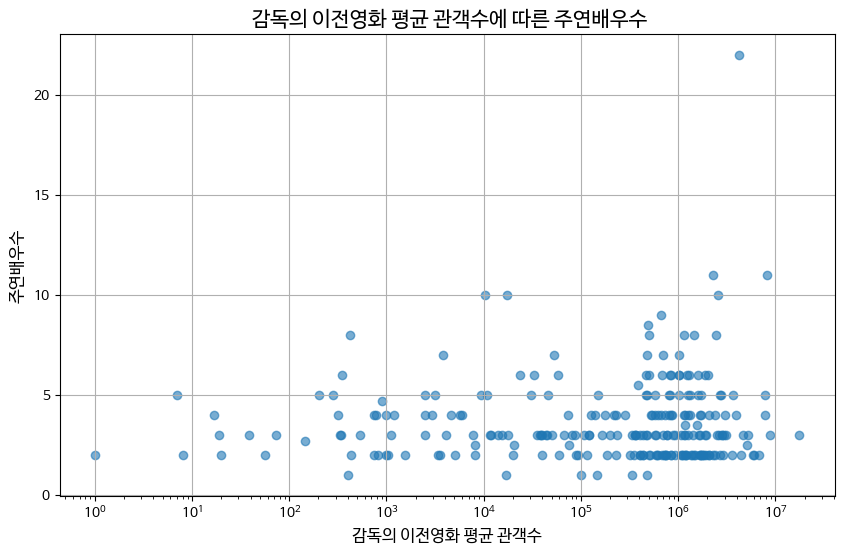

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(filtered_data['dir_prev_bfnum'].values, y=filtered_data['num_actor'].values, alpha=0.6)

plt.xlabel('감독의 이전영화 평균 관객수', fontsize=12)
plt.ylabel('주연배우수', fontsize=12)
plt.title(' 감독의 이전영화 평균 관객수에 따른 주연배우수', fontsize=15)

plt.xscale('log') # x축 데이터를 로그 스케일로 변환하면, 값의 범위가 넓은 경우에도 분포를 더 고르게 나타낼 수 있음
plt.grid(True)
plt.show()

- 분석 결과: 감독의 이전영화 관객수와 주연배우의 수는 무관하다. 감독의 이전영화 관객수가 커져도 주연배우의 수는 영향을 많이 받지 않고 큰 차이가 없다는 것을 알 수 있다. 물론 중간에 관객수가 확 늘어나기는 하지만 다시 비슷한 수준으로 돌아온다.

In [ ]:
correlation_coefficient_2 = np.corrcoef(filtered_data['dir_prev_bfnum'].values, filtered_data['num_actor'].values)[0, 1]

print(f'dir_prev_bfnum과 num_actor 간의 상관계수: {correlation_coefficient_2}')

dir_prev_bfnum과 num_actor 간의 상관계수: 0.09409305349593568


- 일반적으로 상관계수가 0.1이하면 '무관 또는 매우 약한 상관'이라고 해석한다.

## 3. 상영등급과 관객수 간의 관계


In [ ]:
train_rat = train.groupby('screening_rat')['box_off_num'].mean().reset_index()
train_rat

,screening_rat,box_off_num
0,12세 관람가,844980.9
1,15세 관람가,1247518.6
2,전체 관람가,135100.5
3,청소년 관람불가,364181.3


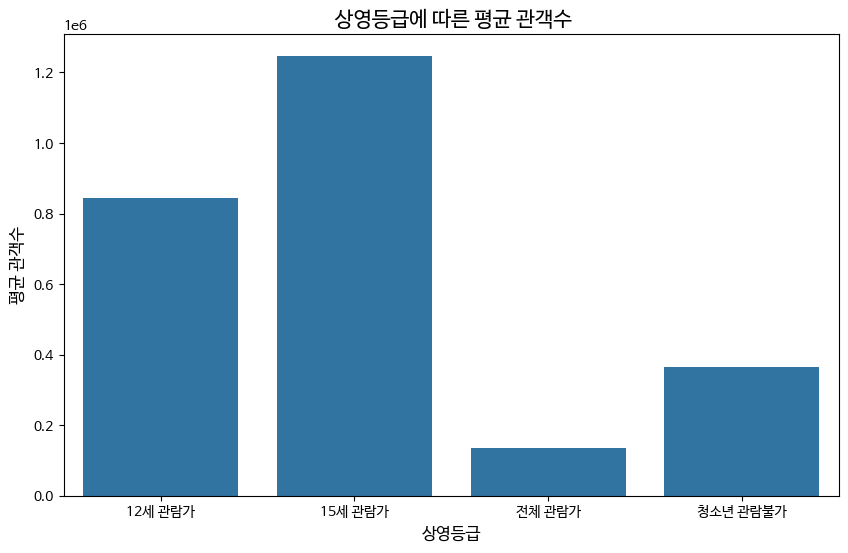

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=train_rat['screening_rat'].values, y=train_rat['box_off_num'].values)

plt.xlabel('상영등급', fontsize=12)
plt.ylabel('평균 관객수', fontsize=12)
plt.title(' 상영등급에 따른 평균 관객수', fontsize=15)

plt.show()

- 분석 결과: 상영등급이 전체 관람가일 때 가장 작은 평균 관객수를 기록했고, 15세 관람가일 때 가장 큰 평균 관객수를 기록했다. 전체관람가는 주로 아이들이 보는 애니메이션인 경우가 많아서 영화의 주요 향유층인 성인들이 잘 보지 않는 장르이므로 관객수가 낮은 것이라고 추측할 수 있다. 반면 15세 관람가는 대부분의 영화들이 속해있는 상영등급이기 때문에 가장 높은 관객수를 보여주고 있다.

## 4. 배급사와 개봉 요일 간의 관계

In [ ]:
# 상위 10개 배급사 선택
top_distributors = train.groupby('distributor')['box_off_num'].sum().nlargest(10).index # 전체 관객수의 평균이 가장 큰 상위 10개 배급사
filtered_data = train[train['distributor'].isin(top_distributors)] # top10 배급사 정보

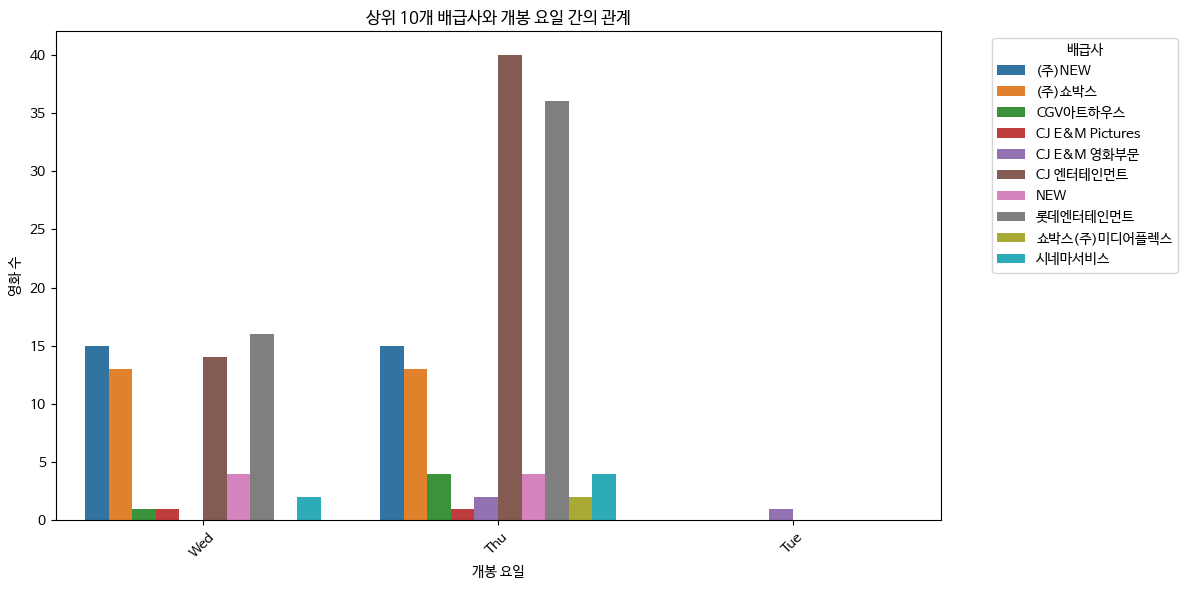

In [ ]:
# 개봉 요일에 따른 데이터 집계
release_weekday_counts = filtered_data.groupby(['distributor', 'release_weekday']).size().reset_index(name='count')

# 요일에 이름 부여
release_weekday_counts['release_weekday'] = release_weekday_counts['release_weekday'].map({
    0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'
})

# 그래프 그리기
plt.figure(figsize=(12, 6))
sns.barplot(data=release_weekday_counts, x='release_weekday', y='count', hue='distributor')
plt.title('상위 10개 배급사와 개봉 요일 간의 관계')
plt.xlabel('개봉 요일')
plt.ylabel('영화 수')
plt.legend(title='배급사', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- 분석 결과: 상위 10개 배급사는 화요일, 수요일, 목요일에만 영화를 개봉한다. 그 중 주로 목요일에 개봉하는 것을 선호한다

## 5. 개봉 요일과 관객수 간의 관계

In [ ]:
# 개봉 요일에 따른 평균 관객수 계산
weekday_avg = train.groupby('release_weekday')['box_off_num'].mean().reset_index()

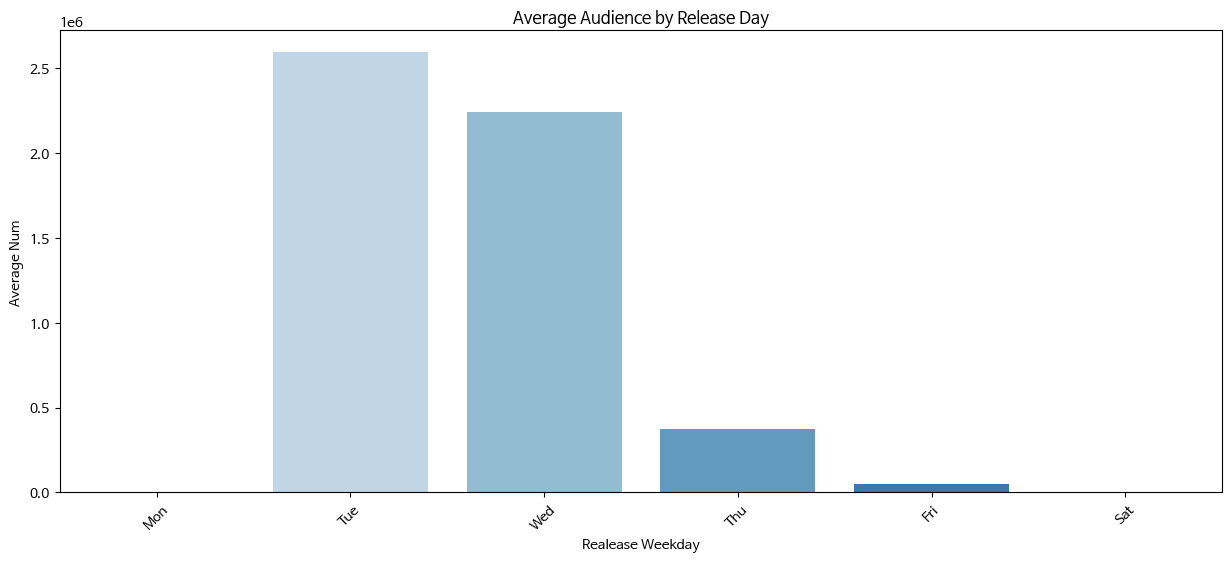

In [ ]:
# 요일 이름 추가
weekday_avg['release_weekday'] = weekday_avg['release_weekday'].map({
    0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'
})

# 시각화
plt.figure(figsize=(15, 6))
sns.barplot(data=weekday_avg, x='release_weekday', y='box_off_num', palette='Blues')
plt.title('Average Audience by Release Day')
plt.xlabel('Realease Weekday')
plt.ylabel('Average Num')
plt.xticks(rotation=45)
plt.show()

- 분석 결과: 화요일과 수요일에 개봉한 영화의 평균 관객수가 높은 편이다.

## 6. 배급사와 장르에 따른 관객수

In [ ]:
# 배급사와 장르에 따른 평균 관객수 계산
grouped_Dis_Gen = train.groupby(['distributor', 'genre'])['box_off_num'].mean().reset_index()

# 상위 10개 배급사 선택
top_distributors = grouped_Dis_Gen.groupby('distributor')['box_off_num'].sum().nlargest(10).index # 전체 관객수의 평균이 가장 큰 상위 10개 배급사
filtered_data = grouped_Dis_Gen[grouped_Dis_Gen['distributor'].isin(top_distributors)] # top10 배급사 정보

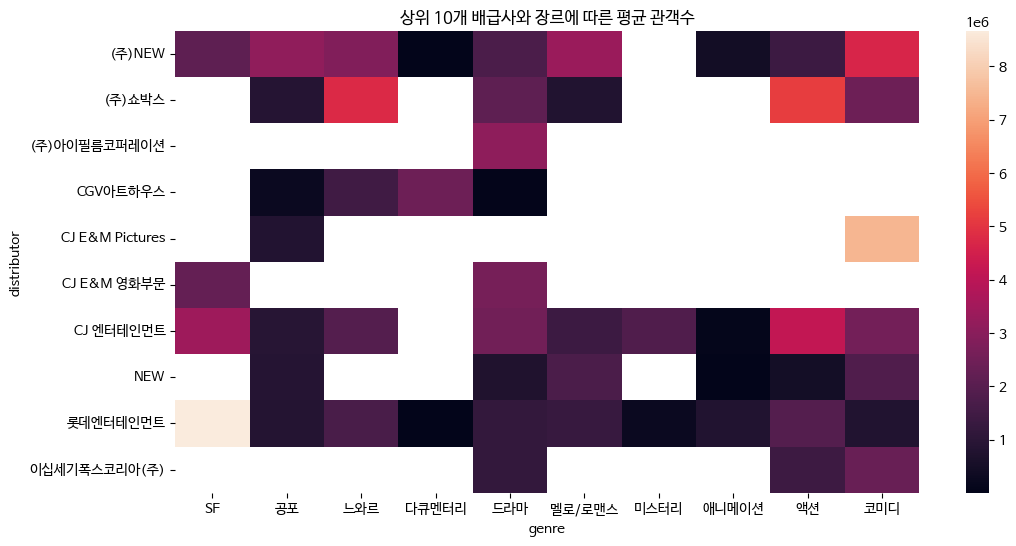

In [ ]:
# 상위 10개 배급사와 장르에 따른 평균 관객수 히트맵 그리기

filtered_df = filtered_data.pivot(index = 'distributor', columns = 'genre', values = 'box_off_num')

plt.figure(figsize=(12,6))
sns.heatmap(filtered_df)
plt.title("상위 10개 배급사와 장르에 따른 평균 관객수")
plt.show()

- 분석 결과: 롯데 엔터테이먼트에서 제작한 SF 장르, CJ E&M Pictures에서 제작한 코미디 장르의 평균 관객수가 높은 편이다. 각 배급사가 제작하지 않거나 주로 제작하는 장르를 파악할 수 있다.

## 7. 장르와 상영 등급 간의 관계

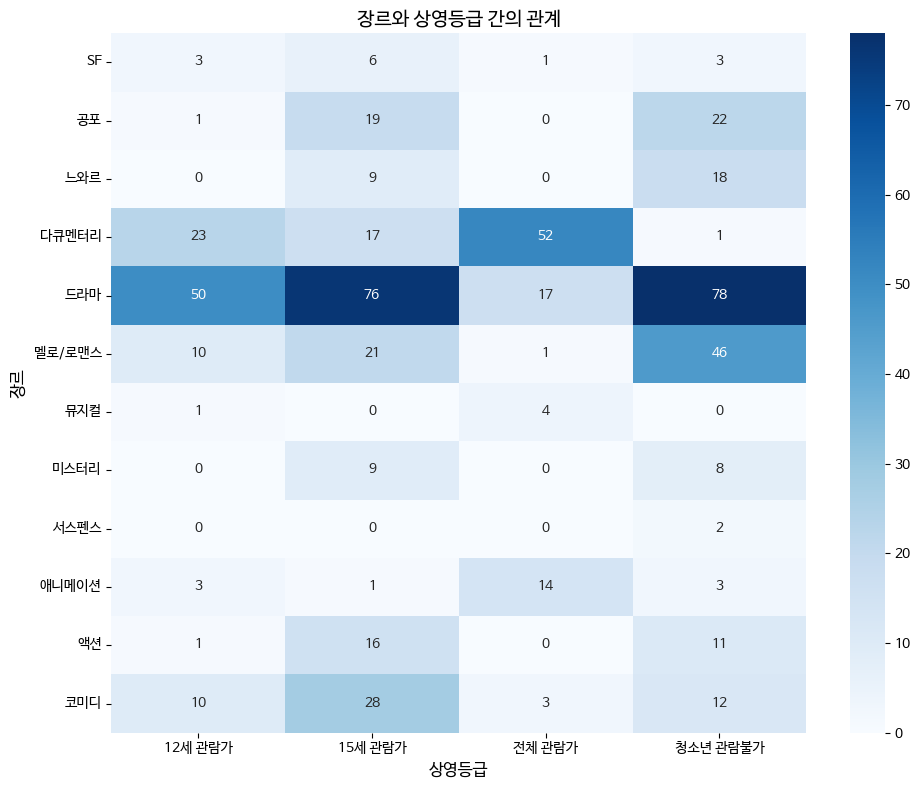

In [ ]:
# 장르와 상영등급 간의 관계를 나타내는 교차표 생성
genre_rating_crosstab = pd.crosstab(train['genre'], train['screening_rat'])

# 그래프 크기 설정
plt.figure(figsize=(10, 8))

# 히트맵 생성
sns.heatmap(genre_rating_crosstab, annot=True, cmap='Blues', fmt='d')

# 제목과 축 레이블 설정
plt.title('장르와 상영등급 간의 관계', fontsize=14)
plt.xlabel('상영등급', fontsize=12)
plt.ylabel('장르', fontsize=12)

# 그래프 출력
plt.tight_layout()
plt.show()

- 분석 결과: 장르에 따라 특정 상영등급에 집중되는 경향이 있다. 대표적인 예시로 공포, 느와르, 액션 같은 성인용 소재가 많이 포함된 영화는 주로 청소년 관람불가나 15세 등급에 속하는 반면 가족이나 어린이를 위한 영화인 애니메이션이나 다큐멘터리는 전체관람과 또는 12세 관람가에서 많이 상영된다.

## 8. 감독의 이전 작품 수와 관객수 간의 관계

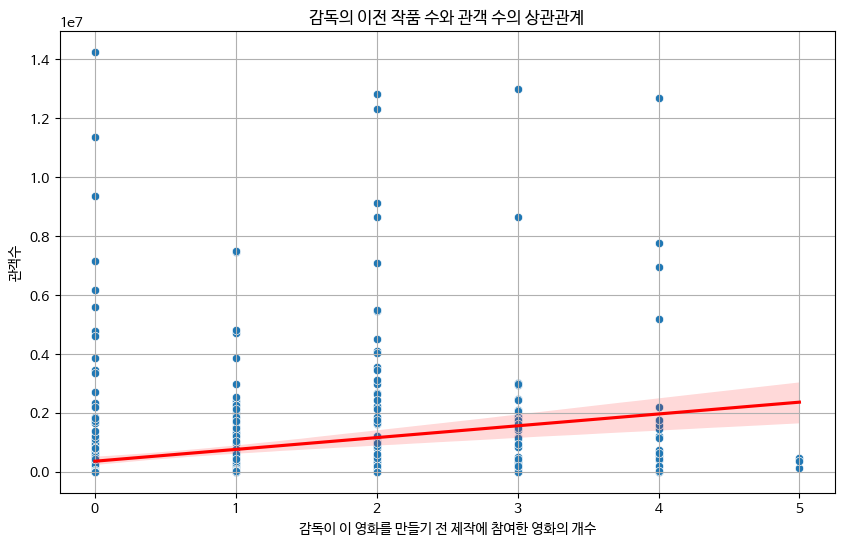

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train, x='dir_prev_num', y='box_off_num')

# 선형 회귀선 추가
sns.regplot(data=train, x='dir_prev_num', y='box_off_num', scatter=False, color='red')

# 그래프 제목과 레이블 설정
plt.title('감독의 이전 작품 수와 관객 수의 상관관계')
plt.xlabel('감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수')
plt.ylabel('관객수')
plt.grid(True)
plt.show()

- 분석 결과

감독이 이전에 참여한 영화의 개수가 많아질수록 관객 수가 약간 증가하는 경향을 보인다. 그러나 전반적으로 상관관계가 매우 강하지는 않아 보인다.

이는 감독의 이전 영화 수가 많다고 해서 반드시 관객 수가 크게 증가하지는
않음을 시사한다.

즉, 감독의 경력(참여 영화 수)이 관객 수에 일부 영향을 미치지만, 그 외의 다른 중요한 요소들도 관객 수에 영향을 미친다고 예측할 수 있다.

## 9. 장르와 상영 시간 간의 관계

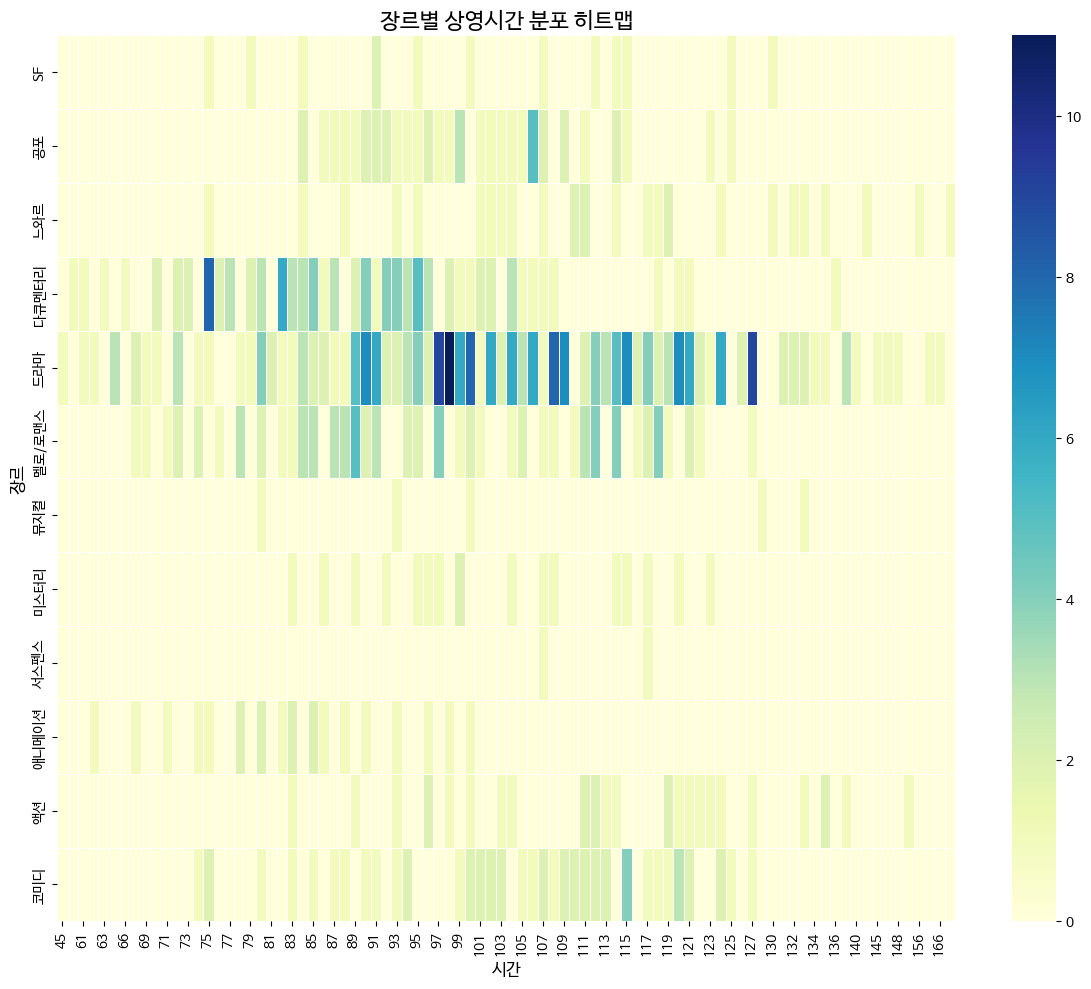

In [ ]:
# 감독별 장르 분포 피벗 테이블 생성
director_genre_pivot = train.pivot_table(index='genre', columns='time', aggfunc='size', fill_value=0)

# 히트맵 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(director_genre_pivot, cmap="YlGnBu", fmt="d", linewidths=0.5)

# 그래프 꾸미기
plt.title('장르별 상영시간 분포 히트맵', fontsize=16)
plt.xlabel('시간', fontsize=12)
plt.ylabel('장르', fontsize=12)

plt.tight_layout()
plt.show()

- 분석 결과

대부분의 영화가 90분에서 120분 사이에 집중되어 있는 것을 통해 일반적인 영화 상영시간이 90~120분이라는 것을 짐작할 수 있다.

자세히 살펴보면 드라마 장르는 주로 90~120분에 집중되어 있고 이보다 긴 영화도 많이 존재한다.

전체적으로 애니메이션의 상영 시간이 다른 영화 장르에 비해 짧은 것을 확인할 수 있다.

## 10. 계절에 따라 개봉하는 영화 장르의 비율

- 봄 : 3,4,5월 / 여름 : 6,7,8월 / 가을 : 9,10,11월 / 겨울 : 12,1,2월로 설정

In [ ]:
# 계절별 데이터프레임 생성
train_spring = train[train['release_season']=='Spring']
train_summer = train[train['release_season']=='Summer']
train_autumn = train[train['release_season']=='Autumn']
train_winter = train[train['release_season']=='Winter']

In [ ]:
# 계절에 따라 개봉한 영화의 장르 비율을 담은 데이터프레임 생성
spring_genre_ratio = (train_spring['genre'].value_counts()/train_spring.shape[0]).head()
summer_genre_ratio = (train_summer['genre'].value_counts()/train_summer.shape[0]).head()
autumn_genre_ratio = (train_autumn['genre'].value_counts()/train_autumn.shape[0]).head()
winter_genre_ratio = (train_winter['genre'].value_counts()/train_winter.shape[0]).head()

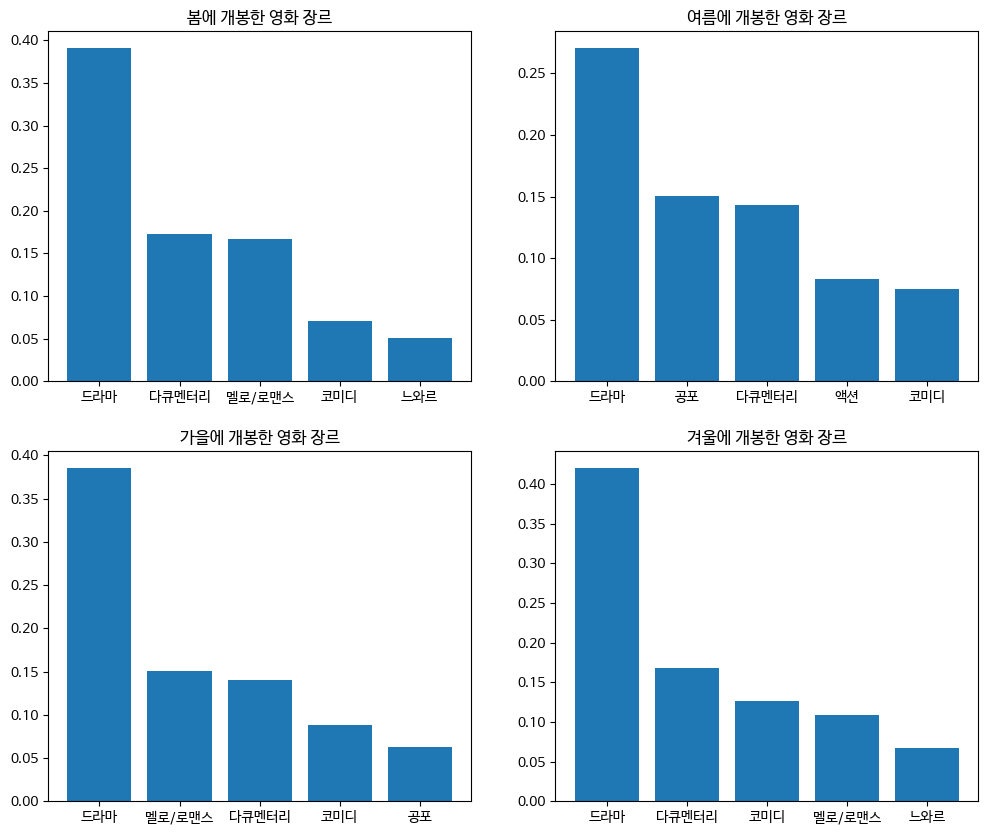

In [ ]:
fig, ax = plt.subplots(figsize=(12,10), nrows=2, ncols=2)
ax[0][0].bar(x=spring_genre_ratio.index, height=spring_genre_ratio)
ax[0][1].bar(x=summer_genre_ratio.index, height=summer_genre_ratio)
ax[1][0].bar(x=autumn_genre_ratio.index, height=autumn_genre_ratio)
ax[1][1].bar(x=winter_genre_ratio.index, height=winter_genre_ratio)

ax[0][0].set_title('봄에 개봉한 영화 장르')
ax[0][1].set_title('여름에 개봉한 영화 장르')
ax[1][0].set_title('가을에 개봉한 영화 장르')
ax[1][1].set_title('겨울에 개봉한 영화 장르')


plt.show()

- 분석 결과: 장르가 드라마인 영화는 항상 많이 개봉하는 것을 알 수 있고, 여름에는 공포 영화가 다른 계절에 비해 눈에 띄게 많이 개봉한다는 것을 알 수 있다. 봄/가을에는 멜로, 로맨스 영화가 많이 개봉한다.

## 11. 연도, 분기별로 상영한 영화의 수

In [ ]:
grouped_df = train.groupby(['release_year','release_quarter']).size().reset_index()
grouped_df = grouped_df.pivot(index=grouped_df.columns[1], columns=grouped_df.columns[0], values=grouped_df.columns[2])

<Axes: xlabel='release_year', ylabel='release_quarter'>

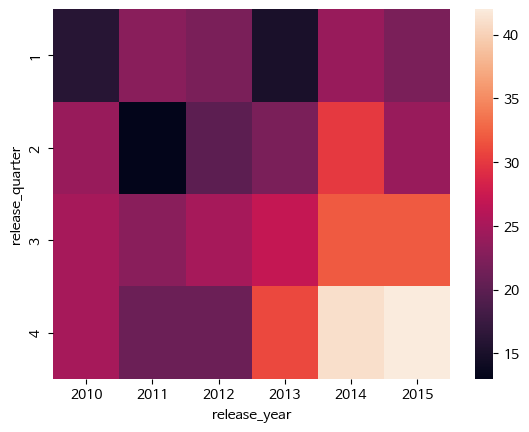

In [ ]:
import seaborn as sns
sns.heatmap(grouped_df)

- 분석 결과: 2011년과 2012년을 제외, 보통 1분기에 영화가 많이 개봉하고 분기가 지날수록 개봉하는 영화 수가 줄어드는 경향이 있다. 해가 갈수록 개봉하는 영화 수가 늘고있다는 것을 확인할 수 있다.

## 12. 배급사와 장르 간의 관계성 (특정 배급사가 선호하는 장르가 있는가?)



[분석 과정]

1. 유의미한 결과 도출을 위해 10편 이상의 영화를 배급한 대형 배급사만을 추출한다.
2. 각 배급사가 상영한 장르의 비율을 의미하는 'proportion' 변수를 생성한다.
3. 배급사와 proportion 변수에 대한 막대그래프를 그린다




In [ ]:
# 10편 이상의 영화를 배급한 배급사는 8 곳이다.
sum(train.groupby(['distributor']).size()>10)

8

In [ ]:
big_distributor = train.groupby(['distributor']).size().reset_index()
big_distributor.columns = ['distributor', 'total']
big_distributor = big_distributor[big_distributor['total']>10]
big_distributor

,distributor,total
4,(주) 케이알씨지,14
6,(주)NEW,30
17,(주)마운틴픽쳐스,29
21,(주)쇼박스,26
51,CJ 엔터테인먼트,54
66,골든타이드픽처스,15
80,롯데엔터테인먼트,52
137,인디스토리,26


In [ ]:
grouped_1 = train.groupby('distributor')['genre'].value_counts().reset_index()
big_dist_genre = pd.merge(grouped_1, big_distributor, on='distributor', how='inner')
big_dist_genre.head()

,distributor,genre,count,total
0,(주) 케이알씨지,멜로/로맨스,12,14
1,(주) 케이알씨지,드라마,2,14
2,(주)NEW,드라마,16,30
3,(주)NEW,코미디,3,30
4,(주)NEW,멜로/로맨스,2,30


In [ ]:
big_dist_genre['proportion'] = big_dist_genre['count']/big_dist_genre['total']
big_dist_genre.head()

,distributor,genre,count,total,proportion
0,(주) 케이알씨지,멜로/로맨스,12,14,0.9
1,(주) 케이알씨지,드라마,2,14,0.1
2,(주)NEW,드라마,16,30,0.5
3,(주)NEW,코미디,3,30,0.1
4,(주)NEW,멜로/로맨스,2,30,0.1


In [ ]:
big_dist_genre = big_dist_genre.groupby('distributor')[['genre','proportion']].max().sort_values('proportion', ascending=False)

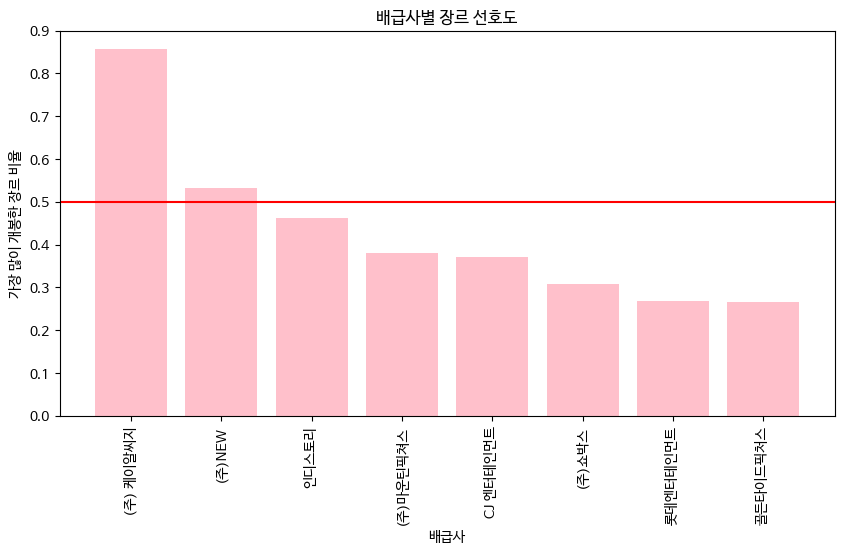

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(big_dist_genre.index, big_dist_genre.proportion, color='pink')
plt.xticks(rotation='vertical')
plt.xlabel('배급사'); plt.ylabel('가장 많이 개봉한 장르 비율')
plt.title('배급사별 장르 선호도')
plt.axhline(0.5,color='red')

- 분석 결과: (주) 케이알씨지, (주)NEW, 인디스토리는 특정 장르의 영화를 많이 배급한다

In [ ]:
# 실제 비율과 장르 확인
big_dist_genre

,genre,proportion
distributor,,
(주) 케이알씨지,멜로/로맨스,0.9
(주)NEW,코미디,0.5
인디스토리,액션,0.5
(주)마운틴픽쳐스,코미디,0.4
CJ 엔터테인먼트,코미디,0.4
(주)쇼박스,코미디,0.3
롯데엔터테인먼트,코미디,0.3
골든타이드픽처스,코미디,0.3


- 분석 결과: (주) 케이알씨지는 멜로/로맨스 영화를, (주)NEW는 코미디, 인디스토리는 액션 영화를 주로 상영한다